In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## Experiment description

The data for this experiment was created using methods from Class_Balancing.py script, which was used to first add imbalance to original data. It removed positive instances from original sample until resulting dataset contained only *10 %* positive instances. Then resulting dataset was balanced using synonym replacement of *Synonym %* of words. Then those dataset were used to train DistilBERT models, which were evaluated on eraser- movie reviews validation sample. For each *Synonym %* experiment was performed 20 times anf for each generated dataset 3 DistilBERT models were trained for one, two, or three epochs.


```pythion
imbalance = 0.1
random_seed = 123
np.random.seed(123)
for syn_prob in [0.01, 0.02, 0.05, 0.1, 0.2]:
    for i in range(20):
        train_dataset_imbalanced = add_imbalance(train_dataset, imbalance, random_seed = np.random.randint(0,123))
        train_dataset_synonym = balance_minority(train_dataset_imbalanced, replace_synonym, **{"prob":syn_prob}, random_seed = np.random.randint(0,123))

        filehandler = open(fr'C:\Users\Maciek\Documents\Studia\Magisterka\Synonym_probability\{dataset}_{int(imbalance*100)}_synonym_{int(syn_prob*100)}%_{i}.obj',"wb")
        pickle.dump(train_dataset_synonym,filehandler)
        filehandler.close()
```

## Loading the data

In [5]:
df = pd.read_csv("synonym_percentage.csv")
df.head()

,Unnamed: 0,0,Synonym %,Model ID,loss,acc,f1,precision,recall,mcc,auc,runtime,samples_per_second,steps_per_second,epoch
0,82,eraser_movie_10_synonym_1_0,1,0,1.079674,0.531250,0.100000,0.625000,0.054348,0.060870,0.687500,2.1029,95.107,6.182,1.0
1,93,eraser_movie_10_synonym_1_1,1,1,1.212402,0.536458,0.082474,0.800000,0.043478,0.105015,0.643696,2.0963,95.407,6.201,1.0
2,96,eraser_movie_10_synonym_1_2,1,2,1.111991,0.531250,0.100000,0.625000,0.054348,0.060870,0.669891,2.1146,94.582,6.148,1.0
3,77,eraser_movie_10_synonym_1_3,1,3,1.172602,0.536458,0.101010,0.714286,0.054348,0.091550,0.735761,2.1096,94.805,6.162,1.0
4,92,eraser_movie_10_synonym_1_4,1,4,1.303758,0.531250,0.100000,0.625000,0.054348,0.060870,0.668043,2.0853,95.910,6.234,1.0


In [11]:
df.describe()

,Unnamed: 0,Synonym %,Model ID,loss,acc,f1,precision,recall,mcc,auc,runtime,samples_per_second,steps_per_second,epoch
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,49.500000,7.600000,9.500000,1.297822,0.533420,0.065806,0.759444,0.035580,0.087787,0.691729,2.044031,97.911787,6.364270,2.000000
std,28.914301,6.957107,5.775916,0.129482,0.015225,0.058128,0.286432,0.035590,0.059000,0.053257,0.053043,2.550322,0.165759,0.817861
min,0.000000,1.000000,0.000000,0.858900,0.510417,0.000000,0.000000,0.000000,-0.043478,0.569565,1.949000,91.148000,5.925000,1.000000
25%,24.750000,2.000000,4.750000,1.216539,0.526042,0.042105,0.666667,0.021739,0.047287,0.658342,1.986750,95.440250,6.203750,1.000000
50%,49.500000,5.000000,9.500000,1.292696,0.531250,0.061856,0.800000,0.032609,0.079079,0.681957,2.049300,97.596000,6.343500,2.000000
75%,74.250000,10.000000,14.250000,1.352117,0.536458,0.082689,1.000000,0.043478,0.106966,0.720217,2.095525,100.664500,6.543250,3.000000
max,99.000000,20.000000,19.000000,1.707501,0.661458,0.453782,1.000000,0.293478,0.421741,0.881196,2.194200,102.619000,6.670000,3.000000


## Distribution of measures for given synonym percentage and for number of epochs the model was trained for

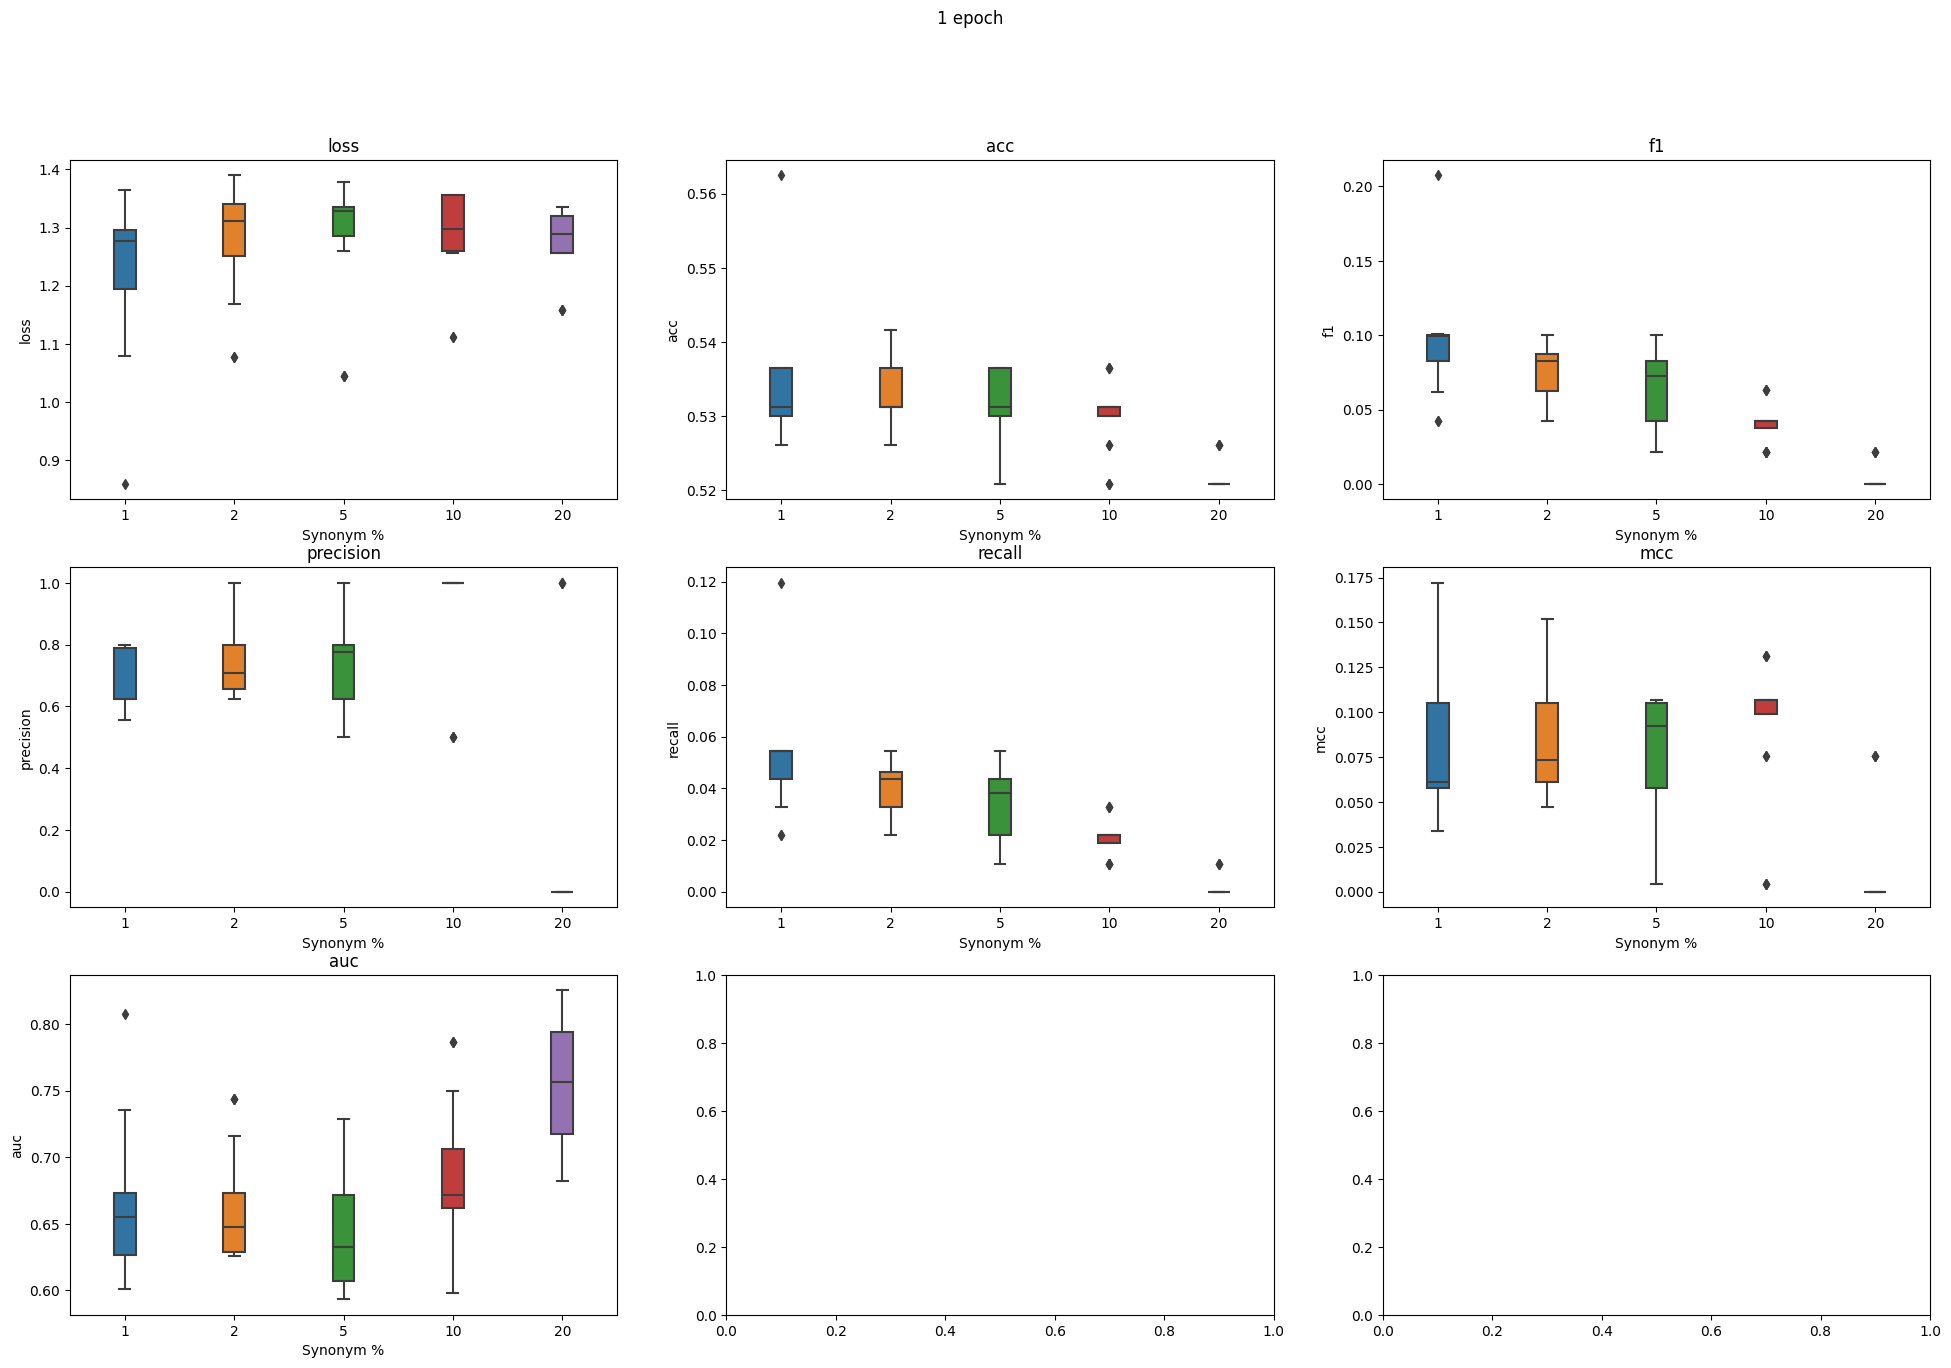

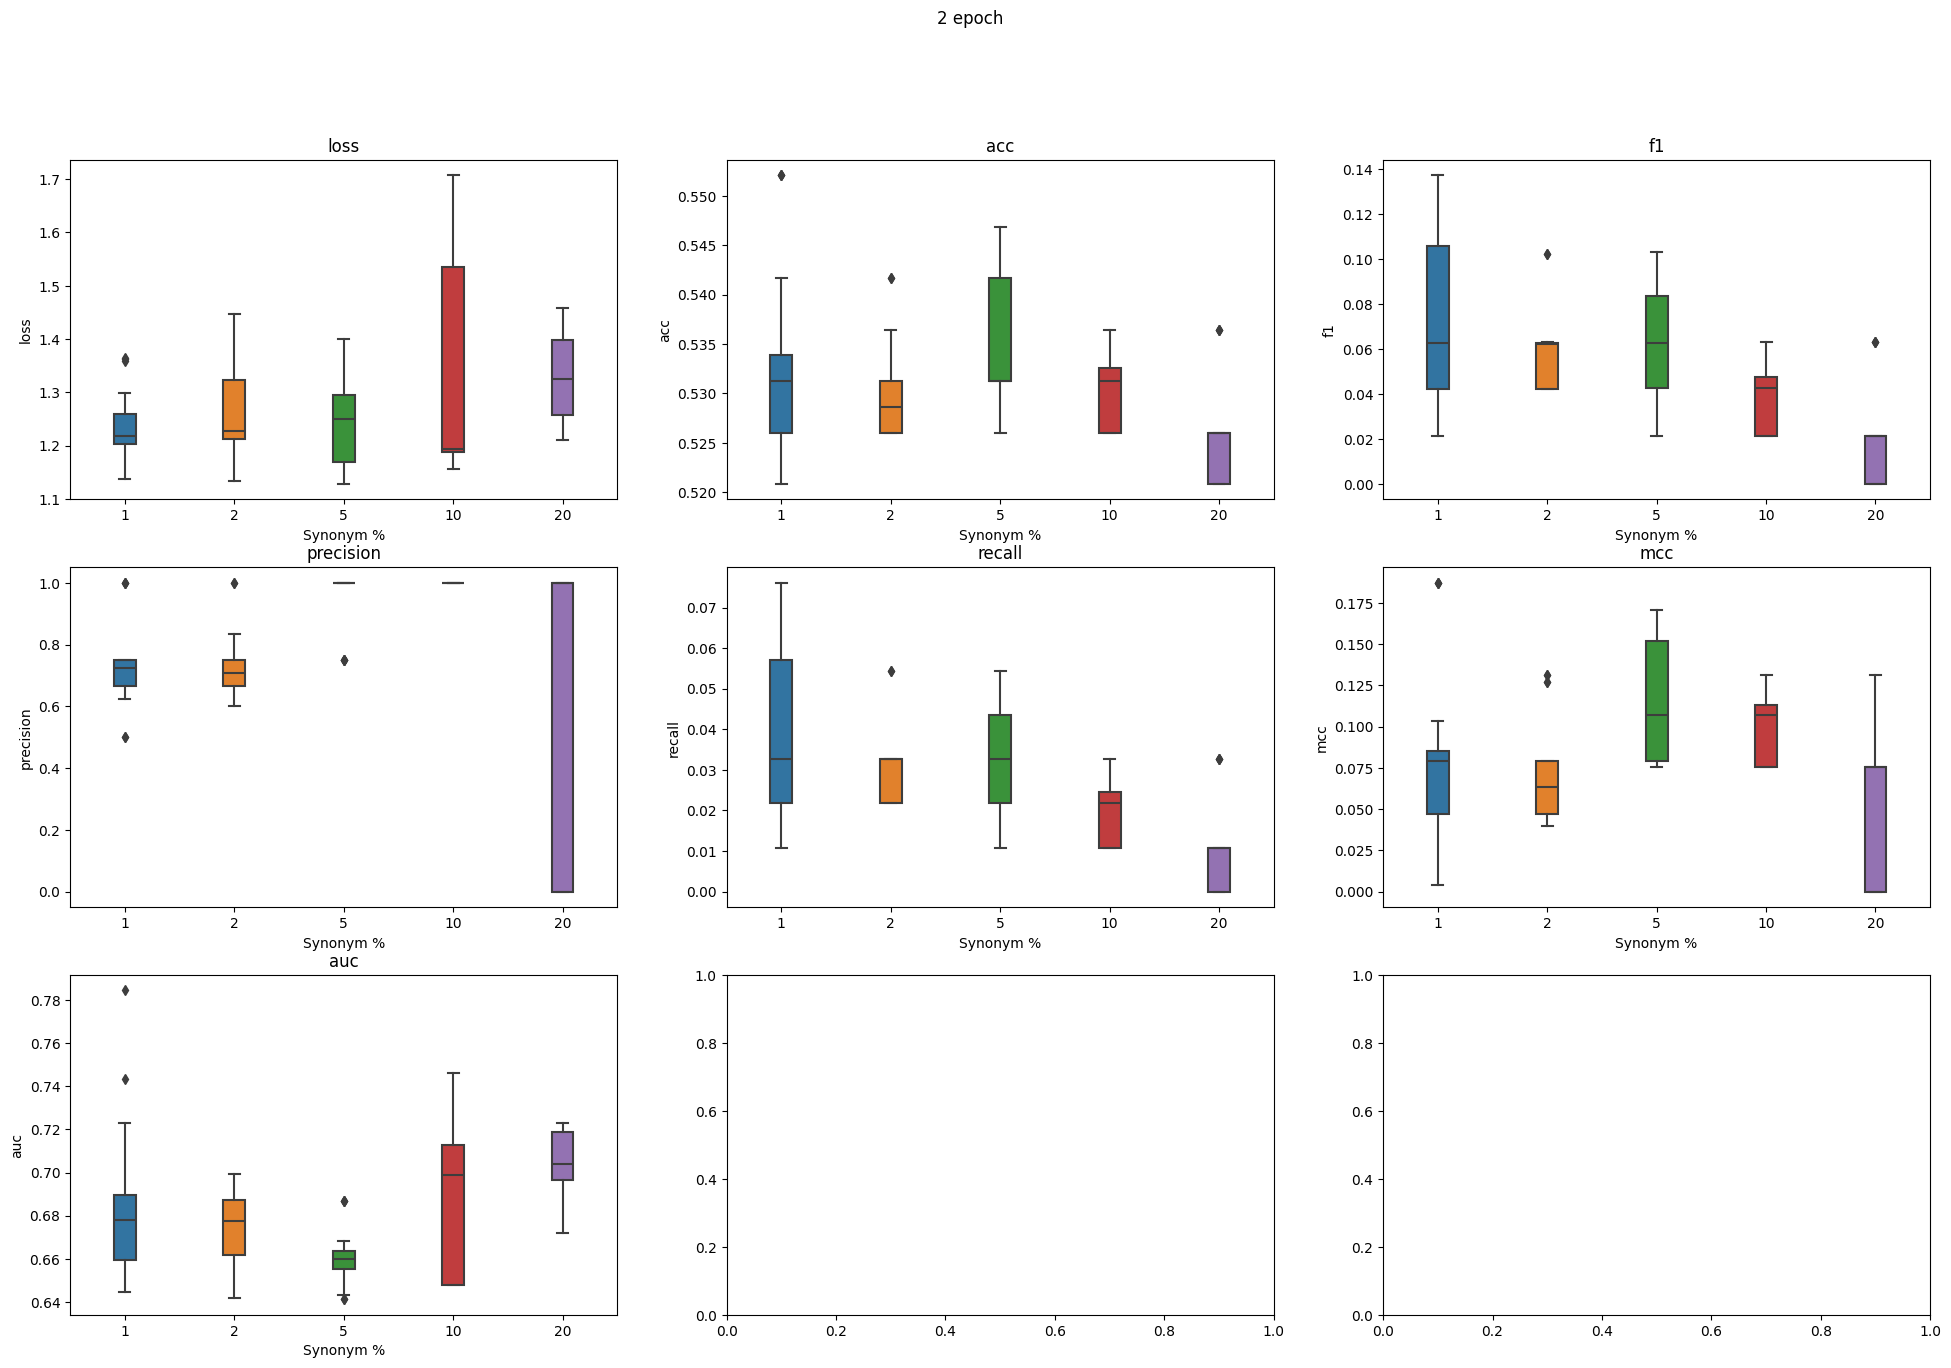

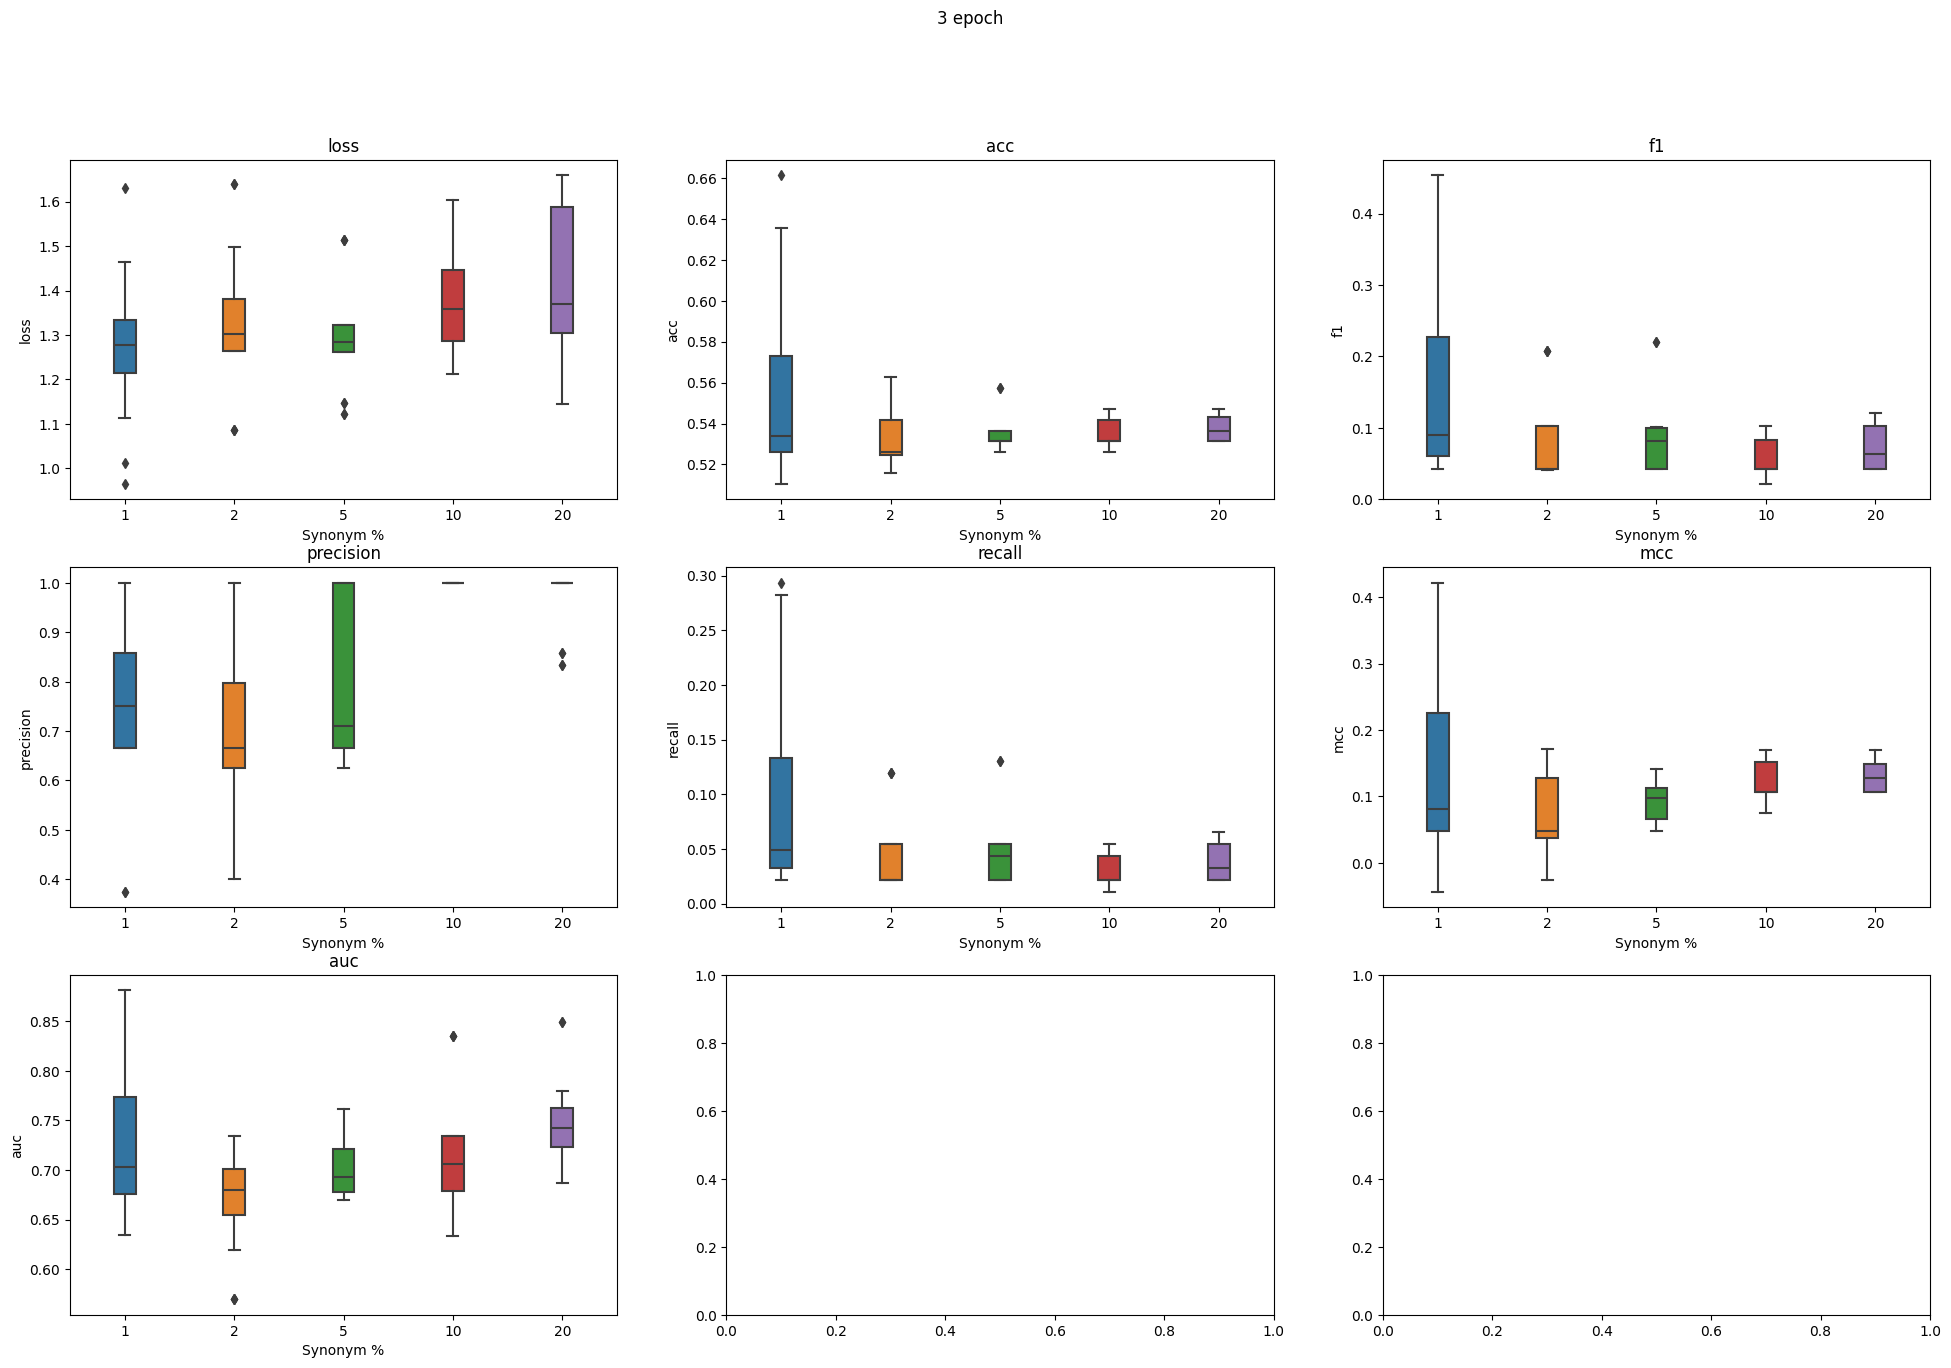

In [10]:
for j in range(1,4):
    fig, ax = plt.subplots(int(np.ceil((len(df.columns)-8)/3)), 3, figsize=(24,5 * int(np.ceil((len(df.columns)-8)/3))))
    i = 0
    for measure in df.columns[4:-4]:
        sns.boxplot(x='Synonym %', y=measure,width = 0.2, data=df[df.epoch==j], ax = ax[i//3, i%3])
        ax[i//3, i%3].set_title(measure)
        i += 1
    fig.suptitle(f'{j} epoch')
    plt.show()